In [1]:
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
def summarise_results(path):
    with open(path, 'r') as file:
            text = file.read()
    print(text)
    loss_regex = r"INFO:root:Test After Training =.*"
    loss_match = re.findall(loss_regex,text)
    if loss_match == []:
        loss_regex = r"INFO:root:Test After Training:	 Average:.*"
        loss_match = re.findall(loss_regex,text)
#     print(loss_match)
    metric_regex=r'\w+@\w+'
    metric_match = re.findall(metric_regex,loss_match[0])
    
    val_regex=r'\d+.\d+'
    val_match = re.findall(val_regex,loss_match[0])
    print(f'Final test results are as follows-')
    for i,j in zip(metric_match,val_match):
        print(f'{i} - {j}')

    print(f'The Best AUC results are as follows-')
    loss_regex = r"INFO:root:u_occupation best AUC.*"
    loss_match = re.findall(loss_regex,text)
    loss_regex=r'\d+.\d+'
    loss_match = re.findall(loss_regex,loss_match[0])
    print(f'Occupation AUC - {float(loss_match[0])}')

    loss_regex = r"INFO:root:u_gender best AUC.*"
    loss_match = re.findall(loss_regex,text)
    loss_regex=r'\d+.\d+'
    loss_match = re.findall(loss_regex,loss_match[0])
    print(f'Gender AUC - {float(loss_match[0])}')

    loss_regex = r"INFO:root:u_age best AUC.*"
    loss_match = re.findall(loss_regex,text)
    loss_regex=r'\d+.\d+'
    loss_match = re.findall(loss_regex,loss_match[0])
    print(f'Age AUC - {float(loss_match[0])}')


In [3]:
def plot_loss(path,title):
    with open(path, 'r') as file:
        text = file.read()
    loss_regex = r"INFO:root:loss = \d+.\d+"
    loss_match = re.findall(loss_regex,text)
    loss_fn=r'\d+.\d+'
    loss=[]
    for i in loss_match:
        text=re.findall(loss_fn,i)
        loss.append(float(text[0]))
    fig = plt.figure()
    sns.set(font="Verdana")
    plt.plot(range(1,len(loss)+1),loss)
    fig.suptitle(title, fontsize=12)
    plt.xlabel('Epochs', fontsize=10)
    plt.ylabel('Loss', fontsize=10)
    plt.savefig(title+'.png')
    

# MLP Baseline

In [1]:
path = 'Log_files/MLP_baseline.rtf'
title='Loss for MLP_baseline'
# summarise_results(path)

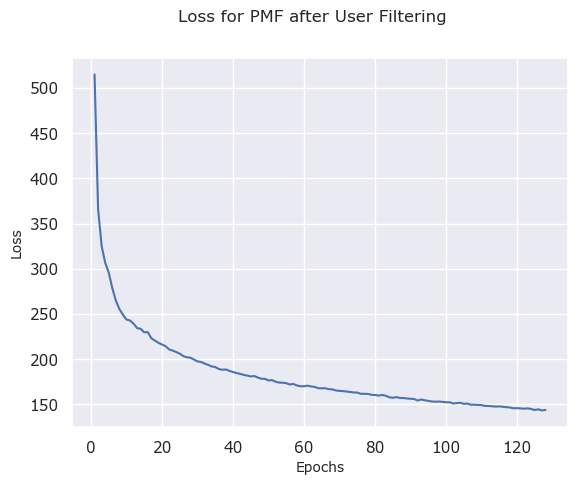

In [12]:
plot_loss(path,title)

# MLP after Filtering

In [6]:
path = 'Log_files/MLP_separate_method.rtf'
title='Loss for MLP after User Filtering'
summarise_results(path)

Final test results are as follows-
ndcg@5 - 0.3616
ndcg@10 - 0.4160
hit@5 - 0.5116
hit@10 - 0.6799
The Best AUC results are as follows-
Occupation AUC - 0.5909
Gender AUC - 0.5499
Age AUC - 0.6424


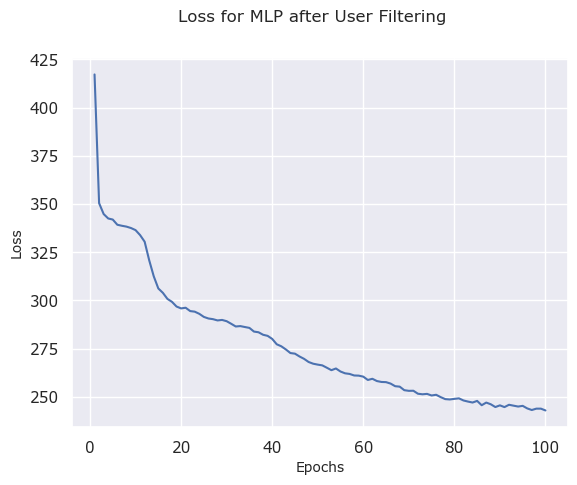

In [7]:
plot_loss(path,title)

# PMF Baseline

In [8]:
path ='Log_files/PMF_baseline.rtf'
title='Loss for PMF_baseline'
summarise_results(path)

Final test results are as follows-
ndcg@5 - 0.4986
ndcg@10 - 0.5422
hit@5 - 0.6483
hit@10 - 0.7828
The Best AUC results are as follows-
Occupation AUC - 0.5967
Gender AUC - 0.7829
Age AUC - 0.805


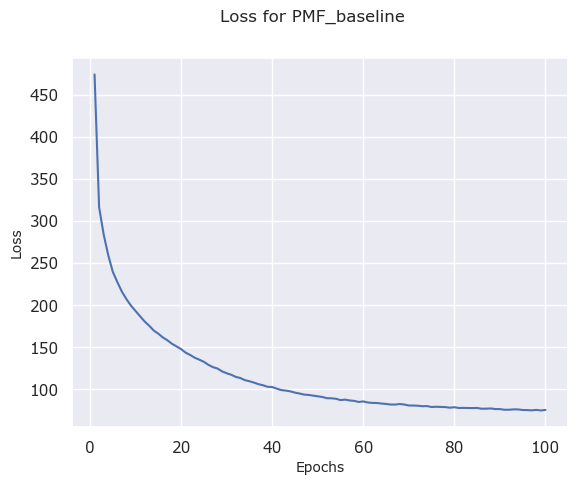

In [9]:
plot_loss(path,title)

# PMF after Filtering

In [10]:
path = 'Log_files/PMF_separate_method.rtf'
title = 'Loss for PMF after User Filtering'
summarise_results(path)

Final test results are as follows-
ndcg@5 - 0.4536
ndcg@10 - 0.5022
hit@5 - 0.6117
hit@10 - 0.7614
The Best AUC results are as follows-
Occupation AUC - 0.5656
Gender AUC - 0.5601
Age AUC - 0.6098


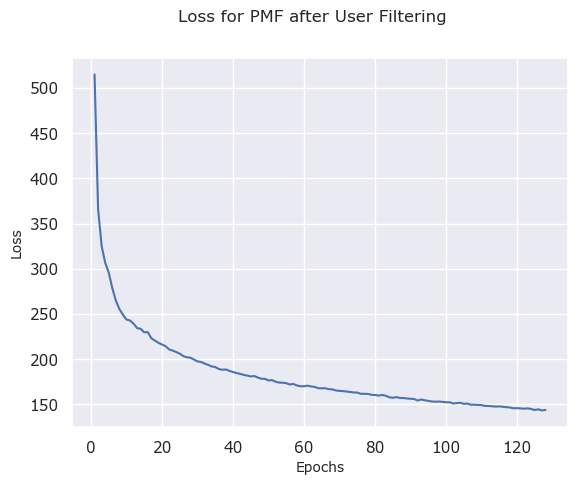

In [11]:
plot_loss(path, title)